In [ ]:
!pip install librosa SpeechRecognition nltk transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 49.4 MB/s eta 0:00:00


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
audio_path = '/content/scots-standard-english-16900.wav'
y, sr = librosa.load(audio_path, sr=None)  # y: audio time series, sr: sampling rate


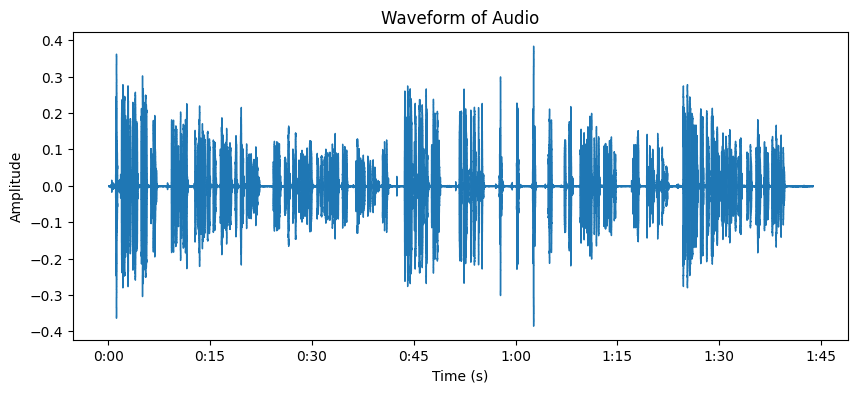

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()



In [ ]:
import speech_recognition as sr


recognizer = sr.Recognizer()

with sr.AudioFile(audio_path) as source:
    audio_data = recognizer.record(source)
try:
    text = recognizer.recognize_google(audio_data)
    print("Transcribed Text:", text)
except sr.UnknownValueError:
    print("Speech Recognition could not understand the audio.")
except sr.RequestError as e:
    print(f"Could not request results from Google Speech Recognition service; {e}")



Transcribed Text: hello I am and receive Ferguson also known as Urban Guerrilla on freesound this is a recording of Scottish Standard English for an American friend of mine Halsted Bernard you're very welcome on the usual terms to use any of it for any of your own projects I should explain that I grew up in 5 which is an area in the Scottish lowlands and although I have what is probably called an educated Scottish accent the five facts is my natural accent and this is the freeze will you tell the girls about the murder rate of squirrels in third world countries Halsted also likes the following Scott's words and until Christmas I hope you've enjoyed this example of Scottish Standard English finally for more information about Halsted go to cinemark.com


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


sentences = sent_tokenize(text)
words = word_tokenize(text.lower())


stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]


word_freq = Counter(filtered_words)


sentence_scores = {sent: sum(word_freq[word] for word in word_tokenize(sent.lower()) if word in word_freq) for sent in sentences}

num_sentences = 3
summary = ' '.join(sorted(sentence_scores, key=sentence_scores.get, reverse=True)[:num_sentences])
print("Summary:", summary)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Summary: hello I am and receive Ferguson also known as Urban Guerrilla on freesound this is a recording of Scottish Standard English for an American friend of mine Halsted Bernard you're very welcome on the usual terms to use any of it for any of your own projects I should explain that I grew up in 5 which is an area in the Scottish lowlands and although I have what is probably called an educated Scottish accent the five facts is my natural accent and this is the freeze will you tell the girls about the murder rate of squirrels in third world countries Halsted also likes the following Scott's words and until Christmas I hope you've enjoyed this example of Scottish Standard English finally for more information about Halsted go to cinemark.com


In [ ]:
from transformers import pipeline

# Load pre-trained summarization pipeline
summarizer = pipeline("summarization")

# Summarize the text
summary = summarizer(text, max_length=130, min_length=30, do_sample=False)
print("Summary:", summary[0]['summary_text'])


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu


Summary:  Scottish Standard English for an American friend of mine Halsted Bernard . He grew up in 5 which is an area in the Scottish lowlands and although he has what is probably called an educated Scottish accent the five facts is my natural accent .
